In [1]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
star_df=pd.read_csv('cleaned_star_data.csv')
star_df.sample(10) # 10 data entries randomly

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
63,2835,0.00034,0.0918,16.960,0,Red,M
159,37800,202900.00000,6.8600,-4.560,3,Blue,O
83,17200,0.00098,0.0150,12.450,2,Blue-White,B
223,23440,537430.00000,81.0000,-5.975,4,Blue,O
66,2945,0.00032,0.0930,18.340,0,Red,M
16,2799,0.00180,0.1600,14.790,1,Red,M
13,3628,0.00550,0.3930,10.480,1,Red,M
106,24630,363000.00000,63.0000,-5.830,4,Blue,O
38,5936,1.35700,1.1060,4.460,3,Yellow-White,F
224,16787,246730.00000,62.0000,-6.350,4,Blue,O


In [6]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


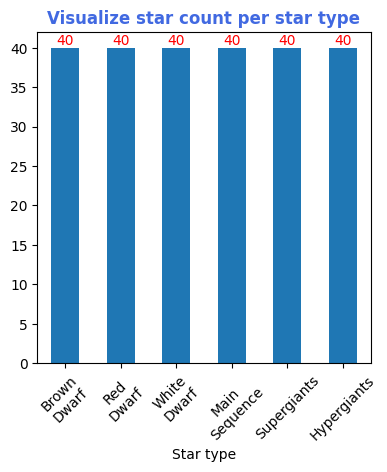

In [7]:
# Bar chart to visualize the count of stars with respective type
plt.figure(figsize=(4.3,4.3))
ax=star_df['Star type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='black')
plt.show()

In [17]:
folder_name='star_plots'
os.makedirs(folder_name,exist_ok=True)
base_dir=f'{folder_name}/'
plt.savefig(base_dir+'barplot_star_count.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
## Using Seaborn

C:\Users\Hp\AppData\Local\Temp\ipykernel_17904\2402653539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


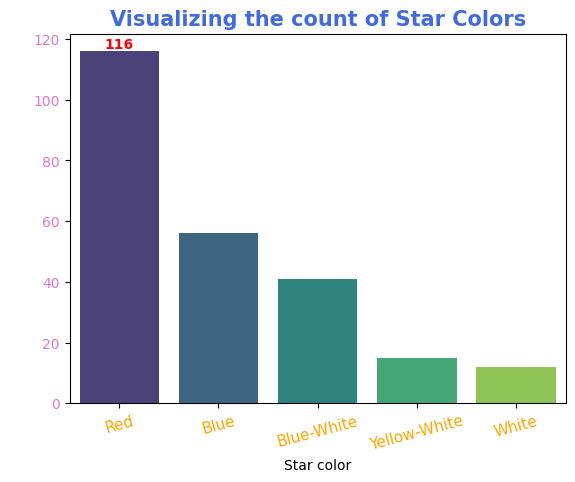

In [9]:
# Visulaising the Star color data
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
#plt.savefig(base_dir+'star_colors_viz.png')
plt.show()

In [ ]:
## Visualizing Outliers

In [8]:
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


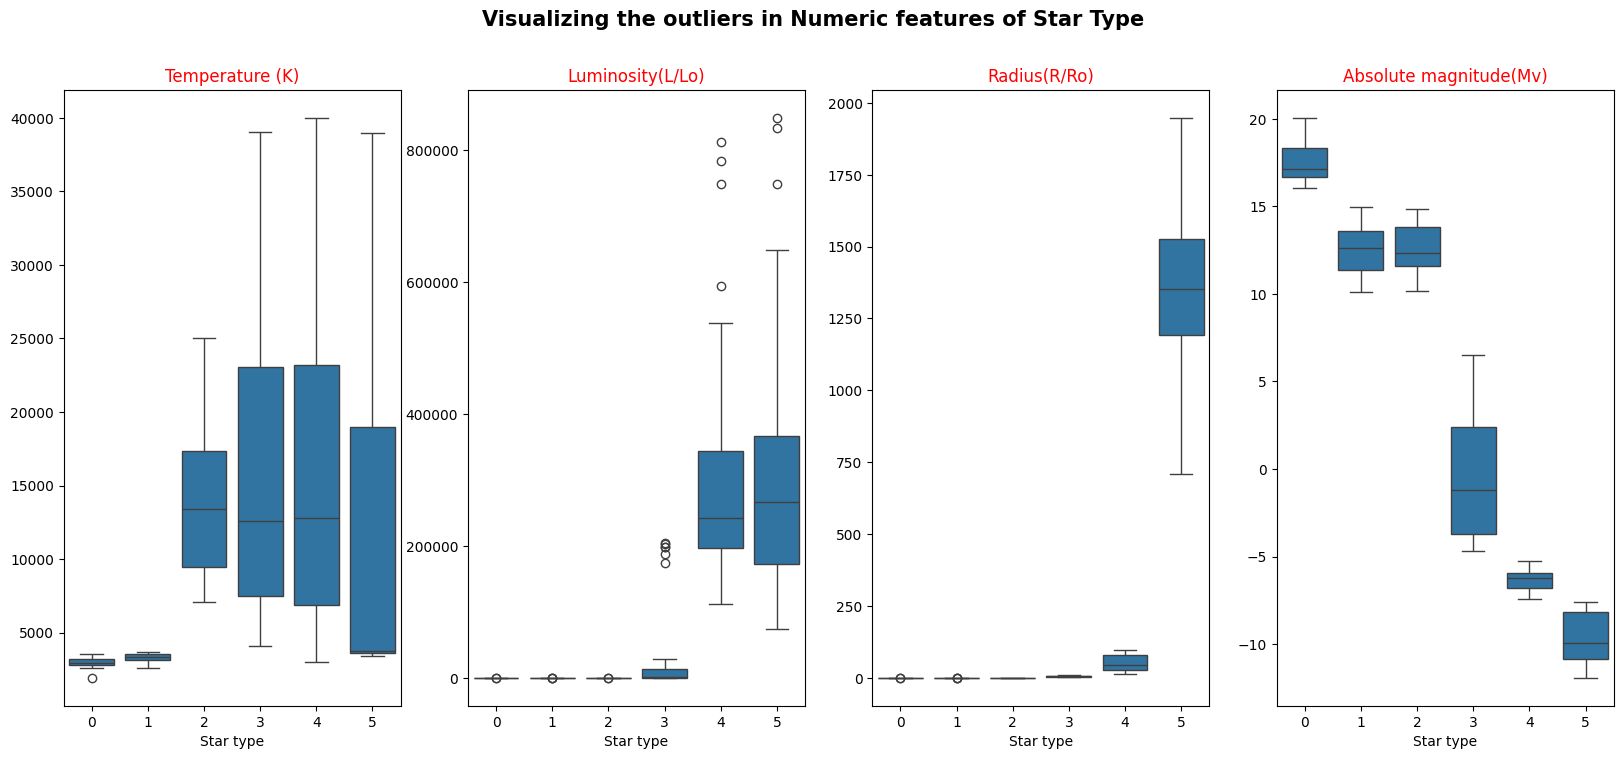

In [11]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)


for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])  # y=selecting entire columns from 1 to 4 
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

# Saving the figure
plt.savefig(base_dir+'boxplot_star_type.png')

In [ ]:
#Temperature-> for type 0 and 1, temp consistent, no extreme outliers
#Luminosity-> higher type stars have many outliers
#magnitude->lower the mag, brighter the star, higher type stars are much brighter 
# **0** → Brown Dwarf      
# **1** → Red Dwarf       
# **2** → White Dwarf       
# **3** → Main Sequence      
# **4** → Supergiants      
# **5** → Hypergiants

In [ ]:
## Visualizing using HR diagrams -> temp VS abs Mag

In [11]:
star_type=star_df['Star type'].values
temperature=star_df['Temperature (K)'].values
abs_mag=star_df['Absolute magnitude(Mv)'].values

In [12]:
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

In [13]:
star_type

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

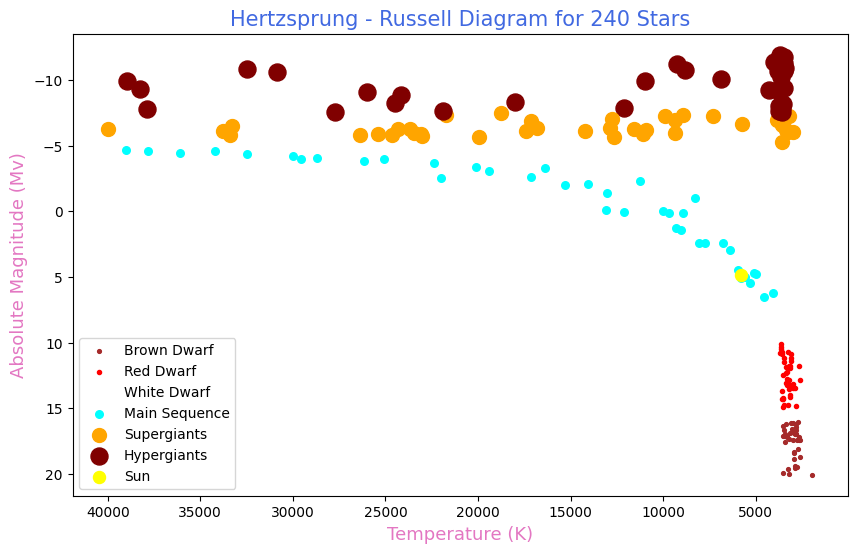

In [18]:
axes=[]
labels=set()
plt.figure(figsize=(10,6))
for i in range(len(star_type)): # for each and every star in data
    properties=star_types[star_type[i]]
    if properties ['label'] not in labels:
        ax=plt.scatter(temperature[i], abs_mag[i],s=properties['size'],c=properties['color'],marker=properties['marker'],label=properties['label'])
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temperature[i],abs_mag[i],s=properties['size'],c=properties['color'],marker=properties['marker'],label=properties['label'])
# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles=axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Save Figure
plt.savefig(base_dir+'hr_diagram.png')
plt.show()
                   
    